# Name :- Pralay K Kalaskar
# Contact :- +91-7066216365
# Mail :- pkkdkalaskar71@gmail.com
# Linkedin :- www.linkedin.com/in/pralay-kalaskar-1010

In [2]:
# "Tab" = shows all the executable operation with the variable object
# "Lfet shift + Tab" = shows parameters inside that particular function
# "Right Ctrl + Enter" = keyboard shortcut for run In[] in python

# K-means clustering :-

### K-means clustering is a technique in which we place each observation in a dataset into one of K clusters.

### The end goal is to have K clusters in which the observations within each cluster are quite similar to each other while the observations in different clusters are quite different from each other.

In [3]:
# lETS START !!

# Importing the Dependencies

In [4]:
# Importing the libraries for use

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Data Collection and Processing

In [10]:
# loading the dataset to pandas DataFrame
dataset = pd.read_csv("Spotifyy.csv")

In [11]:
# print(dataset)
dataset

,Index,Title,Artist,Top Genre,Year,Beats_Per_Minute_(BPM),Energy,Danceability,Loudness_(dB),Liveness,Valence,Length_(Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,1990,Heartbreak Hotel,Elvis Presley,adult standards,1958,94,21,70,-12,11,72,128,84,7,63
1990,1991,Hound Dog,Elvis Presley,adult standards,1958,175,76,36,-8,76,95,136,73,6,69
1991,1992,Johnny B. Goode,Chuck Berry,blues rock,1959,168,80,53,-9,31,97,162,74,7,74
1992,1993,Take Five,The Dave Brubeck Quartet,bebop,1959,174,26,45,-13,7,60,324,54,4,65


In [12]:
features = ["Beats_Per_Minute_(BPM)", "Energy", "Danceability", "Loudness_(dB)", "Liveness", "Valence", "Length_(Duration)", "Acousticness", "Speechiness", "Popularity"]

In [13]:
dataset = dataset.dropna(subset=features)

In [14]:
data = dataset[features].copy()

In [15]:
data

,Beats_Per_Minute_(BPM),Energy,Danceability,Loudness_(dB),Liveness,Valence,Length_(Duration),Acousticness,Speechiness,Popularity
0,157,30,53,-14,11,68,201,94,3,71
1,135,79,50,-11,17,81,207,17,7,39
2,168,69,66,-9,7,52,341,2,17,69
3,173,96,43,-4,3,37,269,0,4,76
4,106,82,58,-5,10,87,256,1,3,59
...,...,...,...,...,...,...,...,...,...,...
1989,94,21,70,-12,11,72,128,84,7,63
1990,175,76,36,-8,76,95,136,73,6,69
1991,168,80,53,-9,31,97,162,74,7,74
1992,174,26,45,-13,7,60,324,54,4,65


In [16]:
# Now let’s have a look at the correlation between all the audio features in the dataset:
data.corr()

,Beats_Per_Minute_(BPM),Energy,Danceability,Loudness_(dB),Liveness,Valence,Length_(Duration),Acousticness,Speechiness,Popularity
Beats_Per_Minute_(BPM),1.000000,0.156644,-0.140602,0.092927,0.016256,0.059653,0.006252,-0.122472,0.085598,-0.003181
Energy,0.156644,1.000000,0.139616,0.735711,0.174118,0.405175,0.022800,-0.665156,0.205865,0.103393
Danceability,-0.140602,0.139616,1.000000,0.044235,-0.103063,0.514564,-0.135432,-0.135769,0.125229,0.144344
Loudness_(dB),0.092927,0.735711,0.044235,1.000000,0.098257,0.147041,-0.056127,-0.451635,0.125090,0.165527
Liveness,0.016256,0.174118,-0.103063,0.098257,1.000000,0.050667,0.032499,-0.046206,0.092594,-0.111978
Valence,0.059653,0.405175,0.514564,0.147041,0.050667,1.000000,-0.203690,-0.239729,0.107102,0.095911
Length_(Duration),0.006252,0.022800,-0.135432,-0.056127,0.032499,-0.203690,1.000000,-0.102319,-0.027826,-0.065403
Acousticness,-0.122472,-0.665156,-0.135769,-0.451635,-0.046206,-0.239729,-0.102319,1.000000,-0.098256,-0.087604
Speechiness,0.085598,0.205865,0.125229,0.125090,0.092594,0.107102,-0.027826,-0.098256,1.000000,0.111689
Popularity,-0.003181,0.103393,0.144344,0.165527,-0.111978,0.095911,-0.065403,-0.087604,0.111689,1.000000


# Pseudocode

## High level

1. Scale data to standardize values
2. Initialize random centroids
3. Get labels for each data point
4. Create new centroids
5. Plot the centroids
6. Repeat 3-5 until the centroids stop changing

### 1. Scaling the data to standardize values

In [17]:
data = ((data - data.min()) / (data.max() - data.min())) * 9 + 1

In [18]:
data.describe()

,Beats_Per_Minute_(BPM),Energy,Danceability,Loudness_(dB),Liveness,Valence,Length_(Duration),Acousticness,Speechiness,Popularity
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,5.431602,6.258926,5.524929,7.476931,2.578436,5.350818,2.156171,3.623461,1.508582,5.907182
std,1.492620,2.055556,1.606553,1.313235,1.552025,2.330457,0.638696,2.637453,0.747436,1.451285
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.301775,4.618557,4.453488,6.760000,1.649485,3.437500,1.811979,1.272727,1.169811,4.867978
50%,5.366864,6.381443,5.500000,7.840000,1.927835,5.125000,2.037149,2.636364,1.339623,6.157303
75%,6.272189,7.958763,6.651163,8.560000,2.948454,7.257812,2.337377,5.545455,1.509434,7.067416
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [19]:
data.head()

,Beats_Per_Minute_(BPM),Energy,Danceability,Loudness_(dB),Liveness,Valence,Length_(Duration),Acousticness,Speechiness,Popularity
0,7.390533,3.505155,5.500000,5.68,1.835052,7.09375,1.736922,9.545455,1.169811,7.067416
1,6.218935,8.051546,5.186047,6.76,2.391753,8.31250,1.777862,2.545455,1.849057,3.831461
2,7.976331,7.123711,6.860465,7.48,1.463918,5.59375,2.692191,1.181818,3.547170,6.865169
3,8.242604,9.628866,4.453488,9.28,1.092784,4.18750,2.200910,1.000000,1.339623,7.573034
4,4.674556,8.329897,6.023256,8.92,1.742268,8.87500,2.112206,1.090909,1.169811,5.853933


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Beats_Per_Minute_(BPM)  1994 non-null   float64
 1   Energy                  1994 non-null   float64
 2   Danceability            1994 non-null   float64
 3   Loudness_(dB)           1994 non-null   float64
 4   Liveness                1994 non-null   float64
 5   Valence                 1994 non-null   float64
 6   Length_(Duration)       1994 non-null   float64
 7   Acousticness            1994 non-null   float64
 8   Speechiness             1994 non-null   float64
 9   Popularity              1994 non-null   float64
dtypes: float64(10)
memory usage: 155.9 KB


### 2. Initialize random centroids

In [21]:
# for single centroid
# centroid = data.apply(lambda x: float(x.sample()))

In [22]:
# centroid

In [23]:
# for multiple centroids
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [24]:
centroids = random_centroids(data, 5)

In [25]:
centroids

,0,1,2,3,4
Beats_Per_Minute_(BPM),5.153846,6.272189,3.822485,4.727811,5.579882
Energy,6.195876,7.123711,6.659794,5.639175,4.340206
Danceability,3.720930,6.755814,7.488372,6.232558,6.023256
Loudness_(dB),8.200000,5.680000,8.920000,8.560000,6.760000
Liveness,8.051546,2.113402,2.484536,2.298969,3.041237
Valence,5.312500,3.718750,8.218750,2.968750,6.437500
Length_(Duration),2.050796,2.105383,2.125853,2.221380,2.091736
Acousticness,4.272727,2.454545,2.363636,2.636364,5.545455
Speechiness,3.716981,1.339623,1.169811,1.169811,1.169811
Popularity,8.179775,6.865169,4.943820,7.977528,6.865169


In [26]:
distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))

In [27]:
distances

,0,1,2,3,4
0,9.959994,8.824756,9.749914,9.300783,4.844410
1,8.676768,5.937402,4.417751,7.668029,6.130586
2,8.625571,4.114602,6.239444,5.579595,6.554673
3,9.458971,5.683865,8.042863,6.145379,8.598636
4,9.226409,6.684100,3.015259,7.037040,7.063821
...,...,...,...,...,...
1989,9.987878,8.908594,8.103397,8.712221,4.528805
1990,7.016239,10.687066,10.023634,11.276073,8.039167
1991,8.433685,8.780892,8.064096,9.727067,6.219476
1992,8.990056,6.644910,8.269249,7.285299,3.775816


### 3. Get labels for each data point / finding cluster labels for each datapoint

In [28]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [29]:
labels = get_labels(data, centroids)

In [30]:
labels

0       4
1       2
2       1
3       1
4       2
       ..
1989    4
1990    0
1991    4
1992    4
1993    4
Length: 1994, dtype: int64

In [31]:
labels.value_counts()

4    630
2    557
3    375
1    355
0     77
dtype: int64

### 4. Create new centroids / update centroid values

In [32]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

### 5. Plot the centroids / plotting K-means iterations

In [33]:
from sklearn.decomposition import PCA
# PCA = Pinciple Component Analysis (used for visuals 10D - 2D data)
import matplotlib.pyplot as plt
# plotting library
from IPython.display import clear_output
#  clear the screen after each iteration

In [34]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

# it is not necessary to write this but its nice to be able to visualize the centroids and cluster shifting as the algorithm iterates.

### 6. Repeat 3-5 until the centroids stop changing

### (main body of the K-means clustering algorithm / pulling the algorithm together)

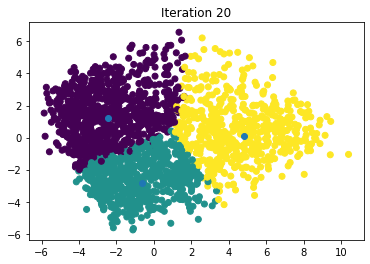

In [35]:
max_iterations = 100
centroid_count = 3

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [36]:
centroids

,0,1,2
Beats_Per_Minute_(BPM),5.286690,5.484931,4.865877
Energy,7.138432,6.696411,3.720116
Danceability,6.371026,4.462730,4.707035
Loudness_(dB),7.695801,7.886706,6.308084
Liveness,2.325114,2.323885,2.179199
Valence,7.397637,3.483738,3.480060
Length_(Duration),2.016676,2.238687,2.046294
Acousticness,2.138233,1.689440,6.873258
Speechiness,1.494007,1.421871,1.304842
Popularity,5.858222,5.649273,5.485525


In [37]:
labels.value_counts()

0    844
1    601
2    549
dtype: int64

In [38]:
dataset[labels == 2][features]

,Beats_Per_Minute_(BPM),Energy,Danceability,Loudness_(dB),Liveness,Valence,Length_(Duration),Acousticness,Speechiness,Popularity
0,157,30,53,-14,11,68,201,94,3,71
10,109,5,44,-16,11,31,162,88,4,49
15,133,42,42,-10,16,25,236,84,4,48
25,130,48,55,-8,10,18,270,48,3,50
28,142,24,34,-11,12,19,259,92,4,48
...,...,...,...,...,...,...,...,...,...,...
1987,119,24,75,-15,9,43,216,83,12,68
1988,168,7,17,-21,14,10,298,92,3,66
1989,94,21,70,-12,11,72,128,84,7,63
1992,174,26,45,-13,7,60,324,54,4,65


### (comparing our implementations to scikit-learn algorithm)

In [39]:
from sklearn.cluster import KMeans

In [40]:
kmeans = KMeans(3)
kmeans.fit(data)

KMeans(n_clusters=3)

In [41]:
centroids = kmeans.cluster_centers_

In [42]:
centroids

array([[5.671186  , 6.98937696, 4.78124368, 7.98973913, 2.59802779,
        3.93505435, 2.30066915, 1.91001318, 1.50672683, 5.88339033],
       [5.12488489, 3.98102281, 4.97262554, 6.48565295, 2.41017649,
        3.88578936, 2.11868779, 7.08375346, 1.35572282, 5.70215674],
       [5.4398475 , 7.29159344, 6.62812549, 7.74577181, 2.68654259,
        7.7613255 , 2.05046634, 2.61403295, 1.62499683, 6.08305558]])

In [44]:
pd.DataFrame(centroids, columns=features).T
# you can compare this with the data which we find below the iteration graphs

,0,1,2
Beats_Per_Minute_(BPM),5.671186,5.124885,5.439848
Energy,6.989377,3.981023,7.291593
Danceability,4.781244,4.972626,6.628125
Loudness_(dB),7.989739,6.485653,7.745772
Liveness,2.598028,2.410176,2.686543
Valence,3.935054,3.885789,7.761326
Length_(Duration),2.300669,2.118688,2.050466
Acousticness,1.910013,7.083753,2.614033
Speechiness,1.506727,1.355723,1.624997
Popularity,5.883390,5.702157,6.083056
